<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Application Programming Interface

Estimated time needed: **15** minutes

## Objectives

After completing this lab you will be able to:

*   Create and Use APIs in Python


### Introduction

An API lets two pieces of software talk to each other. Just like a function,  you don’t have to know how the API works only its inputs and outputs.  An essential type of API is a REST API that allows you to access resources via the internet. In this lab, we will review the Pandas Library  in the context of an API, we will also review a basic REST API


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">
<li><a href="https://#ref0">Pandas is an API</a></li>
<li><a href="https://#ref1">REST APIs Basics  </a></li>
<li><a href="https://#ref2">Quiz on Tuples</a></li>

</div>

<hr>


In [1]:
!pip install pycoingecko
!pip install plotly
!pip install mplfinance

     |████████████████████████████████| 71kB 20.2MB/s eta 0:00:01


<h2 id="PandasAPI">Pandas is an API </h2>


Pandas is actually set of software components , much of  which is not even written in Python.


In [2]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from plotly.offline import plot
import matplotlib.pyplot as plt
import datetime
from pycoingecko import CoinGeckoAPI
from mplfinance.original_flavor import candlestick2_ohlc

You create a dictionary, this is just data.


In [8]:
dict_={'a':[11,21,31],'b':[12,22,32]}
pd.DataFrame(dict_)

,a,b
0,11,12
1,21,22
2,31,32


When you create a Pandas object with the Dataframe constructor in API lingo, this is an "instance". The data in the dictionary is passed along to the pandas API. You then use the dataframe to communicate with the API.


In [9]:
df=pd.DataFrame(dict_)
type(df)

pandas.core.frame.DataFrame

<img src = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/images/pandas_api.png" width = 800, align = "center" alt="logistic regression block diagram" />


When you call the method head the dataframe communicates with the API displaying the first few rows of the dataframe.


In [10]:
df.head()

,a,b
0,11,12
1,21,22
2,31,32


When you call the method mean,the API will calculate the mean and return the value.


In [11]:
df.mean()

a    21.0
b    22.0
dtype: float64

<h2 id="ref1">REST APIs</h2>


Rest API’s function by sending a request,  the request is communicated via HTTP message. The HTTP message usually contains a JSON file. This contains instructions for what operation we would like the service or resource to perform. In a similar manner, API returns a response, via an HTTP message, this response is usually contained within a JSON.

In cryptocurrency a popular method to display the movements of the price of a currency.

![Example Candlestick Graph](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/candlestick.png)

Here is a description of the candle sticks.

<img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/labs/Module%205/explanation.png" alt="Candle Stick Definition" width="800" height="600">

In this lab, we will be using the <a href=https://www.coingecko.com/en/api?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>CoinGecko API</a> to create one of these candlestick graphs for Bitcoin. We will use the API to get the price data for 30 days with 24 observation per day, 1 per hour. We will find the max, min, open, and close price per day meaning we will have 30 candlesticks and use that to generate the candlestick graph. Although we are using the CoinGecko API we will use a Python client/wrapper for the API called <a href=https://github.com/man-c/pycoingecko?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0101ENSkillsNetwork19487395-2021-01-01>PyCoinGecko</a>. PyCoinGecko will make performing the requests easy and it will deal with the enpoint targeting.


Lets start off by getting the data we need. Using the <code>get_coin_market_chart_by_id(id, vs_currency, days)</code>. <code>id</code> is the name of the coin you want, <code>vs_currency</code> is the currency you want the price in, and <code>days</code> is how many days back from today you want.


In [12]:
cg = CoinGeckoAPI()

bitcoin_data = cg.get_coin_market_chart_by_id(id='bitcoin', vs_currency='usd', days=30)

In [13]:
type(bitcoin_data )

dict

The response we get is in the form of a JSON which includes the price, market caps, and total volumes along with timestamps for each observation. We are focused on the prices so we will select that data.


In [16]:
bitcoin_price_data = bitcoin_data['prices']
#pd.DataFrame(bitcoin_price_data)
bitcoin_price_data[0:5]

[[1628402401546, 44842.52004600221],
 [1628406103976, 45157.582575934204],
 [1628409603102, 44863.978956586136],
 [1628414803276, 44627.81968099991],
 [1628414899333, 44627.81968099991]]

Finally lets turn this data into a Pandas DataFrame.


In [22]:
data = pd.DataFrame(bitcoin_price_data, columns=['TimeStamp', 'Price'])
#data[['Price']]

Now that we have the DataFrame we will convert the timestamp to datetime and save it as a column called <code>Date</code>. We will map our <code>unix_to_datetime</code> to each timestamp and convert it to a readable datetime.


In [24]:
data['date'] = data['TimeStamp'].apply(lambda d: datetime.date.fromtimestamp(d/1000.0))
data

,TimeStamp,Price,date
0,1628402401546,44842.520046,2021-08-08
1,1628406103976,45157.582576,2021-08-08
2,1628409603102,44863.978957,2021-08-08
3,1628414803276,44627.819681,2021-08-08
4,1628414899333,44627.819681,2021-08-08
...,...,...,...
719,1630980120590,52506.302531,2021-09-07
720,1630983811565,52774.412756,2021-09-07
721,1630987411660,52643.047547,2021-09-07
722,1630990896110,52592.264954,2021-09-07


Using this modified dataset we can now group by the <code>Date</code> and find the min, max, open, and close for the candlesticks.


In [26]:
candlestick_data = data.groupby(data.date, as_index=False).agg({"Price": ['min', 'max', 'first', 'last']})
candlestick_data

date         Price                                          
                         min           max         first          last
0   2021-08-08  43572.946706  45157.582576  44842.520046  44396.813230
1   2021-08-09  43054.692312  46433.425576  43753.217863  46207.829352
2   2021-08-10  44815.458641  46311.001899  46311.001899  45507.302998
3   2021-08-11  45297.280370  46585.940390  45628.136261  45715.175233
4   2021-08-12  43965.545956  46165.286517  45656.025273  43965.545956
5   2021-08-13  44495.209793  47582.841978  44495.209793  47582.841978
6   2021-08-14  46216.667599  47760.112089  47760.112089  46912.547473
7   2021-08-15  45756.972022  47258.271283  47088.853135  47207.157469
8   2021-08-16  46009.182126  47862.153467  47025.003230  46244.398243
9   2021-08-17  44894.867041  46970.338891  45999.283652  44937.305324
10  2021-08-18  44534.454854  45894.981968  44534.454854  44796.742260
11  2021-08-19  44213.367801  46741.306632  44790.945808  46560.561559
12  2021-08-20  46745.034623  49124.360559  46745.034623  49124.360559
13  2021-08-21  48572.974423  49658.887046  49195.878602  49364.850589
14  2021-08-22  48377.821512  49253.161690  48867.876579  49117.657045
15  2021-08-23  49237.272831  50311.818126  49237.272831  49621.937622
16  2021-08-24  48103.035449  49710.765146  49518.577488  48306.276831
17  2021-08-25  47250.111254  48995.854650  47804.617643  48876.827164
18  2021-08-26  46774.496830  49320.143212  48989.512084  47254.510913
19  2021-08-27  46840.062989  49060.621304  47229.070651  49060.621304
20  2021-08-28  48552.276552  49333.344804  49083.103306  48783.279334
21  2021-08-29  48259.328881  49639.709723  48936.537254  49074.768948
22  2021-08-30  47673.679984  48907.270731  48907.270731  47673.679984
23  2021-08-31  46968.369601  47962.482825  47124.254225  47214.467338
24  2021-09-01  46857.500212  48849.857737  47335.420299  48427.574886
25  2021-09-02  48741.839026  50113.213132  48823.055210  49721.347396
26  2021-09-03  48480.023984  50733.168049  49341.323435  49706.193111
27  2021-09-04  49767.945833  50430.285825  50027.642944  49899.351470
28  2021-09-05  49614.640926  51779.714900  49965.173233  51779.714900
29  2021-09-06  51328.326739  52503.990058  51677.245255  52503.990058
30  2021-09-07  52449.901543  52774.412756  52739.800166  52618.429379

Finally we are now ready to use plotly to create our Candlestick Chart.


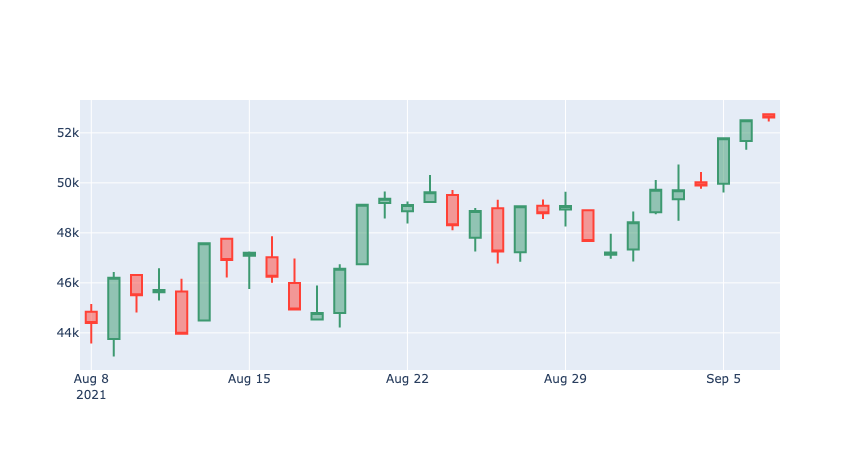

In [28]:
fig = go.Figure(data=[go.Candlestick(x=candlestick_data['date'],
                open=candlestick_data['Price']['first'], 
                high=candlestick_data['Price']['max'],
                low=candlestick_data['Price']['min'], 
                close=candlestick_data['Price']['last'])
                ])

fig.update_layout(xaxis_rangeslider_visible=False)

fig.show()

## Authors:

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                 |
| ----------------- | ------- | ------------- | ---------------------------------- |
| 2020-11-23        | 3.0     | Azim Hirjani  | New API                            |
| 2020-09-09        | 2.1     | Malika Singla | Spell Check                        |
| 2020-08-26        | 2.0     | Lavanya       | Moved lab to course repo in GitLab |
|                   |         |               |                                    |

<hr/>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
